In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]]).T

X = np.concatenate((np.ones(X.shape), X), axis=1)
(N, features) = X.shape

print(X)
print(f"N: {N}, features: {features}")

[[1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]
 [1.   1.5 ]
 [1.   1.75]
 [1.   1.75]
 [1.   2.  ]
 [1.   2.25]
 [1.   2.5 ]
 [1.   2.75]
 [1.   3.  ]
 [1.   3.25]
 [1.   3.5 ]
 [1.   4.  ]
 [1.   4.25]
 [1.   4.5 ]
 [1.   4.75]
 [1.   5.  ]
 [1.   5.5 ]]
N: 20, features: 2


Hàm sigmoid - Vì sao lại lựa chọn hàm sigmoid?
$$
\sigma(s) = \frac{1}{1 + e^{-s}}
$$
Biến ngẫu nhiên độc lập (hàm gốc):
$$
P(y | X; w) = \prod_{i}^{N} P(y_i | x_i; w) = \prod_{i}^{N} z_i^{y_i} (1 - z_i)^{1-y_i}
$$
Với:
$$
z_i = f(s), s = w^T x
$$
Lấy logarit tự nhiên (log cơ số e), xây dựng Loss Function:
$$
J(w, x_i, y_i) = - \sum_{i}^{N}(y_i \log(z_i) + (1 - y_i) \log(1 - z_i))
$$
Đạo hàm theo w của Loss Fuction:
$$
\nabla _w J = \frac{\partial J}{\partial w} = \frac{\partial J}{\partial z_i} \frac{\partial z_i}{\partial s} \frac{\partial s}{\partial w}
$$
Mà ta có
$$
\frac{\partial J}{\partial z_i} = \frac{z_i - y_i}{(1 - z_i)(z_i)}
$$
và
$$
\frac{\partial s}{\partial w} = x_i
$$
Vậy ta tạo một hàm $z = f(s)$ sao cho:
$$
\frac{\partial z}{\partial s} = (1 - z_i)z_i
$$
Hàm $ f(s) $ ở đây chính hàm hàm sigmoid, bị chặn trong khoảng (0, 1) với đạo hàm:
$$
\frac{\partial \sigma(s)}{\partial s} = \sigma(s) (1 - \sigma(s))
$$
Vậy:
$$
\nabla _w J = (z_i - y_i) x_i
$$

In [3]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def check_converged(w, epsilon = 1e-5):
    return (np.linalg.norm(w)/ len(w)) < epsilon 

def loss_function(X, y, w):
    z = sigmoid(X @ w)
    return -np.mean(y*np.log(z) + (1 - y)*np.log(1 - z))

In [4]:
def logistic_regression_SGD(w_init, X, y, eta = 0.05, n_epochs = 10000):
    w = [w_init]
    w_toCheck = w[-1]
    loss_val = [loss_function(X, y, w[-1])]
    
    epochs, count, iter_check = n_epochs, 0, 20
    for ep in range(epochs):
        permute = np.random.permutation(N)
        for i in permute:
            count += 1
            x_i = X[i, :].reshape(1, -1)
            y_i = y[i].reshape(1, 1)
            gradient = (x_i.T @ (sigmoid(x_i @ w[-1]) - y_i))
            w_next = w[-1] - eta*gradient
            w.append(w_next)
            if (~(count % iter_check)):
                if (check_converged(w_next - w_toCheck)):
                    return w, ep, loss_val
                w_toCheck = w[-1]
        loss_val.append(loss_function(X, y, w[-1]))
                   
    return w, ep, loss_val
         
def logistic_regression_NAG(w_init, X, y, eta = 0.01, gamma = 0.9, n_epochs = 10000):
    w = [w_init]
    w_toCheck = w[-1]
    v = [np.zeros_like(w[-1])]
    loss_val = [loss_function(X, y, w[-1])]
    
    epochs, count, iter_check = n_epochs, 0, 20
    for ep in range(epochs):
        count += 1
        gradient = (X.T @ (sigmoid(X @ (w[-1] - gamma*v[-1])) - y))
        v_next = gamma*v[-1] + eta*gradient
        w_next = w[-1] - v_next
        w.append(w_next)
        loss_val.append(loss_function(X, y, w[-1]))
        if (~(count % iter_check)):
            if (check_converged(w_next - w_toCheck)):
                return v, w, ep, loss_val
            w_toCheck = w[-1]
    
    return v, w, ep, loss_val             

In [5]:
w_init = np.random.randn(features, 1)
w_sgd, ep_sgd, loss_sgd = logistic_regression_SGD(w_init, X, y, eta = 0.05, n_epochs = 1000)
print(f'Solution of Logistic Regression with SGD: {w_sgd[-1].T}, {ep_sgd + 1} epochs')
print(f'Final Loss: {loss_sgd[-1]}')

Solution of Logistic Regression with SGD: [[-4.08297586  1.59809112]], 1000 epochs
Final Loss: 0.40549379362780735


Text(0, 0.5, 'loss function')

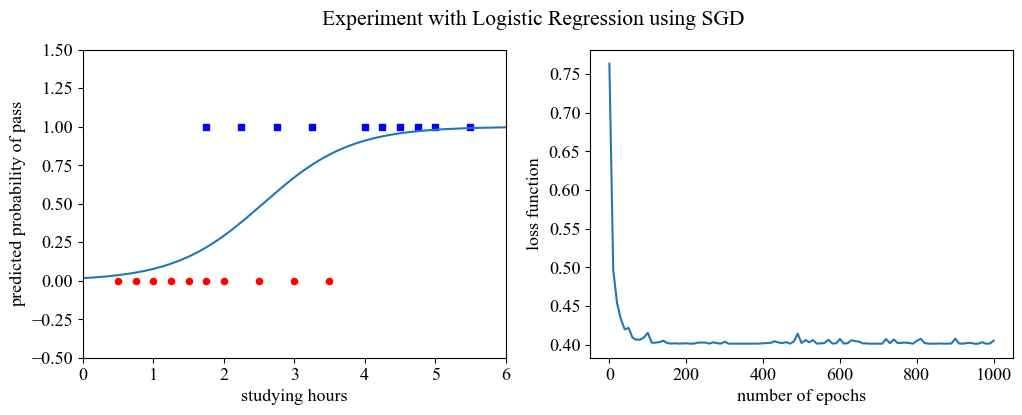

In [6]:
X0 = X[np.where(y == 0)[0]][:, 1]
y0 = y[np.where(y == 0)[0]]
X1 = X[np.where(y == 1)[0]][:, 1]
y1 = y[np.where(y == 1)[0]]

plt.figure(figsize = (12, 4))
plt.rc('font', family = 'Times New Roman', size = 13)
plt.suptitle('Experiment with Logistic Regression using SGD')

# Plot 1
plt.subplot(1, 2, 1)
plt.scatter(X0, y0, c = 'red', marker = 'o', s = 20)
plt.scatter(X1, y1, c = 'blue', marker = 's', s = 20)
plt.axis([0, 6, -0.5, 1.5])
x_s = np.linspace(0, 6, 1000)
plt.plot(x_s, sigmoid(w_sgd[-1][0] + x_s*w_sgd[-1][1]), linewidth = 1.5)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')

# Plot 2
xx = [i for i in range(0,len(loss_sgd),10)]
yy = [loss_sgd[i] for i in xx]
plt.subplot(1, 2, 2)
plt.plot(xx, yy)
plt.xlabel('number of epochs')
plt.ylabel('loss function')

In [7]:
v, w_nag, ep_nag, loss_nag = logistic_regression_NAG(w_init, X, y, eta = 0.02, gamma = 0.9)
print(f'Solution of Logistic Regression with NAG: {w_nag[-1].T}, {ep_nag + 1} epochs')
print(f'Final Loss: {loss_nag[-1]}')

Solution of Logistic Regression with NAG: [[-4.07446917  1.50354723]], 1097 epochs
Final Loss: 0.40149400823383985


Text(0, 0.5, 'loss function')

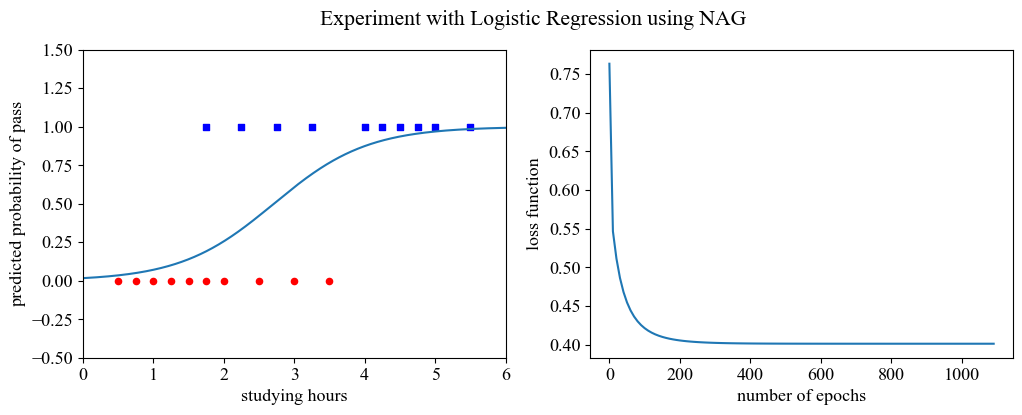

In [8]:
plt.figure(figsize = (12, 4))
plt.rc('font', family = 'Times New Roman', size = 13)
plt.suptitle('Experiment with Logistic Regression using NAG')
# Plot 1
plt.subplot(1, 2, 1)
plt.scatter(X0, y0, c = 'red', marker = 'o', s = 20)
plt.scatter(X1, y1, c = 'blue', marker = 's', s = 20)
plt.axis([0, 6, -0.5, 1.5])
x_s = np.linspace(0, 6, 1000)
plt.plot(x_s, sigmoid(w_nag[-1][0] + x_s*w_nag[-1][1]), linewidth = 1.5)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')

# Plot 2
xx = [i for i in range(0,len(loss_nag),10)]
yy = [loss_nag[i] for i in xx]
plt.subplot(1, 2, 2)
plt.plot(xx, yy)
plt.xlabel('number of epochs')
plt.ylabel('loss function')

In [9]:
from sklearn.linear_model import LogisticRegression

lamda = 1e5
model = LogisticRegression(C = lamda).fit(X[:, 1].reshape(-1, 1), y)
print(f'Solution of Logistic Regression with Sklearn: {np.array([[model.intercept_[0], model.coef_[0][0]]])}')

Solution of Logistic Regression with Sklearn: [[-4.07873143  1.5050406 ]]
